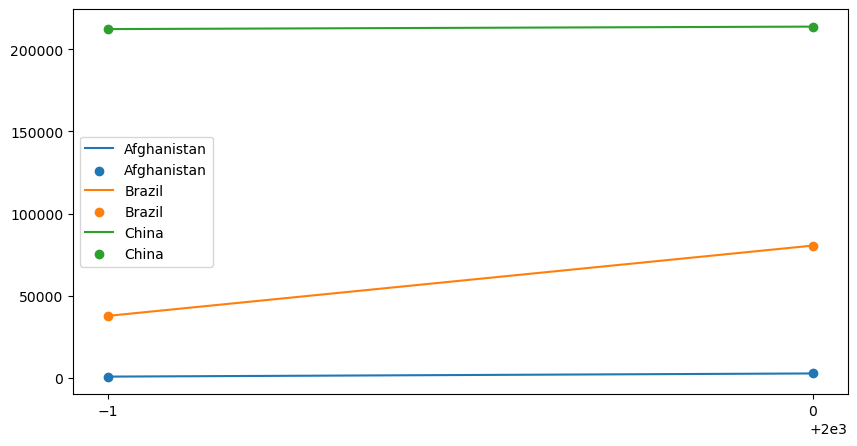

/var/folders/fw/m5f2ykhd1yzc0yxvp3g1vy180000gp/T/ipykernel_5081/1314911738.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  billboard_longer['week'] = billboard_longer['week'].str.extract('(\d+)').astype(int)


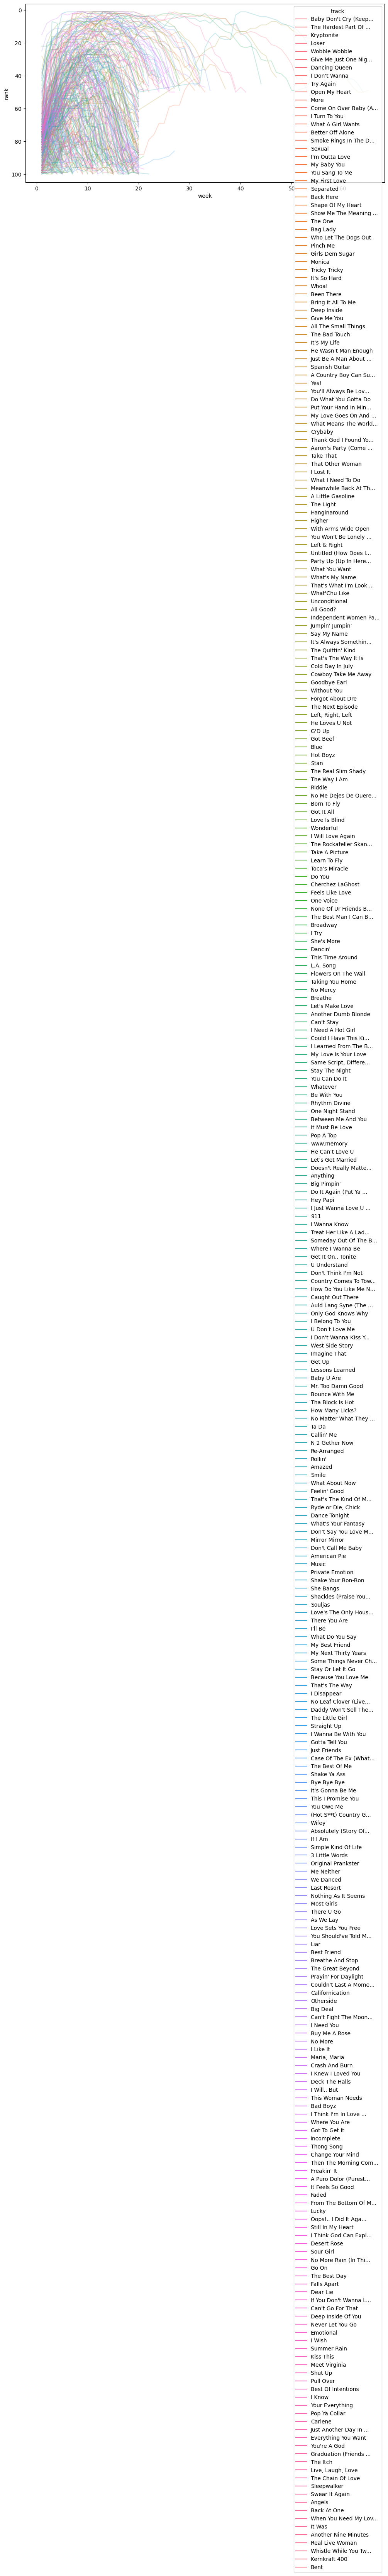

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

table1 = pd.read_csv('data/table1.csv')
table2 = pd.read_csv('data/table2.csv')
table3 = pd.read_csv('data/table3.csv')
billboard = pd.read_csv('data/billboard.csv')
who2 = pd.read_csv('data/who2.csv')
household = pd.read_csv('data/household.csv')
cms_patient_experience = pd.read_csv('data/cms_patient_experience.csv')

# Modify table1
table1['rate'] = table1['cases'] / table1['population'] * 10000

# Compute total cases per year
total_cases_by_year = table1.groupby('year')['cases'].sum().reset_index()

# Visualize changes over time
plt.figure(figsize=(10, 5))
colors = sns.color_palette('tab10', n_colors=table1['country'].nunique())
country_to_color = dict(zip(table1['country'].unique(), colors))

for country in table1['country'].unique():
    subset = table1[table1['country'] == country]
    plt.plot(subset['year'], subset['cases'], label=country, color=country_to_color[country])
    plt.scatter(subset['year'], subset['cases'], label=country, color=country_to_color[country])

# for country in table1['country'].unique():
#     subset = table1[table1['country'] == country]
#     plt.plot(subset['year'], subset['cases'], label=country, color='grey50')
#     plt.scatter(subset['year'], subset['cases'], label=country)
plt.xticks([1999, 2000])
plt.legend()
plt.show()

# Pivot billboard
billboard_long = billboard.melt(id_vars=[col for col in billboard.columns if col.startswith("wk") == False], 
                                value_vars=[col for col in billboard.columns if col.startswith("wk")], 
                                var_name="week", value_name="rank")
billboard_longer = billboard_long.dropna(subset=['rank'])
billboard_longer['week'] = billboard_longer['week'].str.extract('(\d+)').astype(int)

# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=billboard_longer, x="week", y="rank", hue="track", alpha=0.25)
plt.gca().invert_yaxis()
plt.show()

# df example (the first one)
data = {'id': ['A', 'B', 'C'],
        'bp1': [100, 140, 120],
        'bp2': [120, 115, 125]}
df = pd.DataFrame(data)
df_long = df.melt(id_vars=['id'], value_vars=['bp1', 'bp2'], var_name='measurement', value_name='value')

cols_to_melt = [col for col in who2.columns if col not in ['country', 'year']]
who2_long = who2.melt(id_vars=['country', 'year'], 
                      value_vars=cols_to_melt, 
                      var_name='combined', 
                      value_name='count')

# Assuming that the original column names are separated by underscores (e.g., "diagnosis_gender_age")
who2_long[['diagnosis', 'gender', 'age']] = who2_long['combined'].str.split('_', expand=True)
who2_long = who2_long.drop(columns=['combined'])

household_long = household.melt(id_vars=['family'], 
                                var_name='combined', 
                                value_name='value').dropna()

# Assuming that the original column names are separated by underscores (e.g., ".value_child")
household_long[['.value', 'child']] = household_long['combined'].str.split('_', expand=True)
household_long = household_long.drop(columns=['combined'])


# cms_patient_experience (assuming you have the data)
# distinct_values = cms_patient_experience[['measure_cd', 'measure_title']].drop_duplicates()
# wider_df = cms_patient_experience.pivot(index='measure_cd', columns='measure_cd', values='prf_rate')
# wider_df_2 = cms_patient_experience.pivot(index=[col for col in cms_patient_experience.columns if col.startswith('org')], 
#                                          columns='measure_cd', 
#                                          values='prf_rate')

# Second df example
data = {'id': ['A', 'B', 'B', 'A', 'A'],
        'measurement': ['bp1', 'bp1', 'bp2', 'bp2', 'bp3'],
        'value': [100, 140, 115, 120, 105]}
df = pd.DataFrame(data)
df_wider = df.pivot(index='id', columns='measurement', values='value')
distinct_measurements = df['measurement'].drop_duplicates()
distinct_id = df[['id']].drop_duplicates()
distinct_id[['x', 'y', 'z']] = None
grouped_df = df.groupby(['id', 'measurement']).size().reset_index(name='n').query("n > 1")
